# RFM Analysis #

**RFM (Recency, Frequency, Monetary) adalah teknik marketing yang menentukan pelanggan mana yang paling terkini dalam hal transaksi (Recency), paling sering bertransaksi (Frequency), dan terbesar dalam jumlah transaksi (Monetary).**

# Dataset #

**Data yang digunakan adalah data transaksi sebuah toko sepeda yang sudah disaring dengan query SQL untuk menunjukkan nama pelanggan, tanggal transaksi terakhir, banyaknya transaksi untuk setiap pelanggan, dan volume transaksi.**

In [3]:
# Import library
import pandas as pd
import numpy as np

In [4]:
# Menampilkan dataset yang digunakan
data = pd.read_csv('RFM.csv')
data

,customer_id,customer_name,last_transaction_date,transaction_count,transaction_amount
0,1,Debra Burks,2018-11-18,11,27888.17
1,2,Kasha Todd,2018-04-09,10,19329.07
2,3,Tameka Fisher,2018-10-21,13,24051.51
3,4,Daryl Spence,2018-04-18,9,21150.88
4,5,Charolette Rice,2018-04-17,8,17520.28
...,...,...,...,...,...
1440,1441,Jamaal Morrison,2018-01-26,3,9173.38
1441,1442,Cassie Cline,2017-07-30,5,6987.24
1442,1443,Lezlie Lamb,2016-11-15,5,10372.09
1443,1444,Ivette Estes,2016-12-20,2,1399.97


# Data Formatting

**Data yang diimport ke kernel ini merupakan hasil query SQL. Karena itu, tipe data harus diperiksa sesuai kaidah dataframe pandas. Jika ada tipe data yang tidak sesuai maka harus diubah terlebih dahulu.**

In [5]:
data.dtypes

customer_id                int64
customer_name             object
last_transaction_date     object
transaction_count          int64
transaction_amount       float64
dtype: object

In [6]:
import datetime

In [7]:
data['last_transaction_date'] = pd.to_datetime(data['last_transaction_date'], format='%Y-%m-%d')

In [8]:
data.dtypes

customer_id                       int64
customer_name                    object
last_transaction_date    datetime64[ns]
transaction_count                 int64
transaction_amount              float64
dtype: object

# Ranking

**Data parameter RFM seperti tanggal transaksi terakhir, banyanya transaksi, dan volume transaksi diperingkat untuk masing-masing pelanggan**

In [19]:
data['Recency_rank'] = data['last_transaction_date'].rank(ascending=True)
data['Frequency_rank'] = data['transaction_count'].rank(ascending=True)
data['Monetary_rank'] = data['transaction_amount'].rank(ascending=True)

In [20]:
data

,customer_id,customer_name,last_transaction_date,transaction_count,transaction_amount,Recency_rank,Frequency_rank,Monetary_rank,R_Score,F_Score,M_Score
0,1,Debra Burks,2018-11-18,11,27888.17,1443.0,1441.0,1439.0,1.01,4.99,4.98
1,2,Kasha Todd,2018-04-09,10,19329.07,1345.5,1432.0,1417.0,1.28,4.96,4.92
2,3,Tameka Fisher,2018-10-21,13,24051.51,1442.0,1445.0,1432.0,1.01,5.00,4.96
3,4,Daryl Spence,2018-04-18,9,21150.88,1386.0,1419.0,1425.0,1.16,4.93,4.94
4,5,Charolette Rice,2018-04-17,8,17520.28,1380.0,1405.5,1399.0,1.18,4.89,4.87
...,...,...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal Morrison,2018-01-26,3,9173.38,1215.0,697.0,1195.0,1.64,2.93,4.31
1441,1442,Cassie Cline,2017-07-30,5,6987.24,921.5,1252.0,1062.0,2.45,4.47,3.94
1442,1443,Lezlie Lamb,2016-11-15,5,10372.09,489.0,1252.0,1253.0,3.65,4.47,4.47
1443,1444,Ivette Estes,2016-12-20,2,1399.97,541.0,387.0,295.0,3.50,2.07,1.81


# Scoring

**Peringkat masing-masing parameter RFM ditransformasikan dengan MinMax Scaling untuk menjadi skor dengan rentang 1-5 untuk menilai karakter pelanggan berdasarkan parameter RFM**

In [21]:
data['R_Score'] = (data['Recency_rank']-1)/(len(data)-1)*(5-1)+1
data['F_Score'] = (data['Frequency_rank']-1)/(len(data)-1)*(5-1)+1
data['M_Score'] = (data['Monetary_rank']-1)/(len(data)-1)*(5-1)+1

In [22]:
data

,customer_id,customer_name,last_transaction_date,transaction_count,transaction_amount,Recency_rank,Frequency_rank,Monetary_rank,R_Score,F_Score,M_Score
0,1,Debra Burks,2018-11-18,11,27888.17,1443.0,1441.0,1439.0,4.994460,4.988920,4.983380
1,2,Kasha Todd,2018-04-09,10,19329.07,1345.5,1432.0,1417.0,4.724377,4.963989,4.922438
2,3,Tameka Fisher,2018-10-21,13,24051.51,1442.0,1445.0,1432.0,4.991690,5.000000,4.963989
3,4,Daryl Spence,2018-04-18,9,21150.88,1386.0,1419.0,1425.0,4.836565,4.927978,4.944598
4,5,Charolette Rice,2018-04-17,8,17520.28,1380.0,1405.5,1399.0,4.819945,4.890582,4.872576
...,...,...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal Morrison,2018-01-26,3,9173.38,1215.0,697.0,1195.0,4.362881,2.927978,4.307479
1441,1442,Cassie Cline,2017-07-30,5,6987.24,921.5,1252.0,1062.0,3.549861,4.465374,3.939058
1442,1443,Lezlie Lamb,2016-11-15,5,10372.09,489.0,1252.0,1253.0,2.351801,4.465374,4.468144
1443,1444,Ivette Estes,2016-12-20,2,1399.97,541.0,387.0,295.0,2.495845,2.069252,1.814404


In [23]:
data['R_Score'] = data['R_Score'].round(2)
data['F_Score'] = data['F_Score'].round(2)
data['M_Score'] = data['M_Score'].round(2)

In [24]:
data

,customer_id,customer_name,last_transaction_date,transaction_count,transaction_amount,Recency_rank,Frequency_rank,Monetary_rank,R_Score,F_Score,M_Score
0,1,Debra Burks,2018-11-18,11,27888.17,1443.0,1441.0,1439.0,4.99,4.99,4.98
1,2,Kasha Todd,2018-04-09,10,19329.07,1345.5,1432.0,1417.0,4.72,4.96,4.92
2,3,Tameka Fisher,2018-10-21,13,24051.51,1442.0,1445.0,1432.0,4.99,5.00,4.96
3,4,Daryl Spence,2018-04-18,9,21150.88,1386.0,1419.0,1425.0,4.84,4.93,4.94
4,5,Charolette Rice,2018-04-17,8,17520.28,1380.0,1405.5,1399.0,4.82,4.89,4.87
...,...,...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal Morrison,2018-01-26,3,9173.38,1215.0,697.0,1195.0,4.36,2.93,4.31
1441,1442,Cassie Cline,2017-07-30,5,6987.24,921.5,1252.0,1062.0,3.55,4.47,3.94
1442,1443,Lezlie Lamb,2016-11-15,5,10372.09,489.0,1252.0,1253.0,2.35,4.47,4.47
1443,1444,Ivette Estes,2016-12-20,2,1399.97,541.0,387.0,295.0,2.50,2.07,1.81


# Best Customer's Recency

In [25]:
#Best Customer's Recency
best_recency = data[['customer_id','customer_name','last_transaction_date','R_Score']].sort_values(by='R_Score', ascending=False)
best_recency

,customer_id,customer_name,last_transaction_date,R_Score
135,136,Sarita Parks,2018-12-28,5.00
134,135,Dorthey Jackson,2018-11-28,5.00
0,1,Debra Burks,2018-11-18,4.99
2,3,Tameka Fisher,2018-10-21,4.99
14,15,Linnie Branch,2018-08-25,4.99
...,...,...,...,...
1203,1204,Leslie Higgins,2016-01-04,1.01
522,523,Joshua Robertson,2016-01-02,1.01
323,324,Laureen Paul,2016-01-04,1.01
1211,1212,Jaqueline Cummings,2016-01-01,1.00


# Best Customer's Recency

In [18]:
#Best Customer's Frequency
best_frequency = data[['customer_id','customer_name','transaction_count','F_Score']].sort_values(by='F_Score', ascending=False)
best_frequency

,customer_id,customer_name,transaction_count,F_Score
2,3,Tameka Fisher,13,5.00
15,16,Emmitt Sanchez,12,5.00
0,1,Debra Burks,11,4.99
5,6,Lyndsey Bean,11,4.99
42,43,Mozelle Carter,11,4.99
...,...,...,...,...
1266,1267,Earline Gordon,1,1.32
571,572,Wm Pope,1,1.32
1269,1270,Ciera Webb,1,1.32
163,164,Tomika Larson,1,1.32


# Best Customer's Monetary

In [26]:
#Best Customer's Monetary
best_monetary = data[['customer_id','customer_name','transaction_amount','M_Score']].sort_values(by='M_Score', ascending=False)
best_monetary

,customer_id,customer_name,transaction_amount,M_Score
9,10,Pamelia Newman,33634.24,5.00
93,94,Sharyn Hopkins,34807.93,5.00
5,6,Lyndsey Bean,32675.06,4.99
15,16,Emmitt Sanchez,31925.87,4.99
74,75,Abby Gamble,32802.99,4.99
...,...,...,...,...
751,752,Lloyd Miranda,170.99,1.01
1413,1414,Sonja Walls,176.69,1.01
176,177,Carissa Foreman,170.99,1.01
849,850,Stephanie Browning,104.49,1.00


# RFM Score Table

In [28]:
rfm = data[['customer_id','customer_name','R_Score','F_Score','M_Score']]
rfm

,customer_id,customer_name,R_Score,F_Score,M_Score
0,1,Debra Burks,4.99,4.99,4.98
1,2,Kasha Todd,4.72,4.96,4.92
2,3,Tameka Fisher,4.99,5.00,4.96
3,4,Daryl Spence,4.84,4.93,4.94
4,5,Charolette Rice,4.82,4.89,4.87
...,...,...,...,...,...
1440,1441,Jamaal Morrison,4.36,2.93,4.31
1441,1442,Cassie Cline,3.55,4.47,3.94
1442,1443,Lezlie Lamb,2.35,4.47,4.47
1443,1444,Ivette Estes,2.50,2.07,1.81


In [30]:
rfm.to_excel('rfm.xlsx', index=False)

# Matrix Confusion

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#batas kategori Low, Medium, High
recency_bins = [0,2,4,5]
frequency_bins = [0,2,4,5]

In [33]:
#melabeli skor dengan kategori
rfm['R_category'] = pd.cut(rfm['R_Score'], bins=recency_bins, labels=['Low', 'Medium', 'High'])
rfm['F_category'] = pd.cut(rfm['F_Score'], bins=recency_bins, labels=['Low', 'Medium', 'High'])
rfm['M_category'] = pd.cut(rfm['M_Score'], bins=recency_bins, labels=['Low', 'Medium', 'High'])

/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_1261/3465082504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_category'] = pd.cut(rfm['R_Score'], bins=recency_bins, labels=['Low', 'Medium', 'High'])
/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_1261/3465082504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F_category'] = pd.cut(rfm['F_Score'], bins=recency_bins, labels=['Low', 'Medium', 'High'])
/var/folders/bc/dy88t47d1xj40g_47xyk27j40000gn/T/ipykernel_1261/34

In [34]:
confusion_matrix = pd.crosstab(rfm['R_category'], rfm['F_category'])

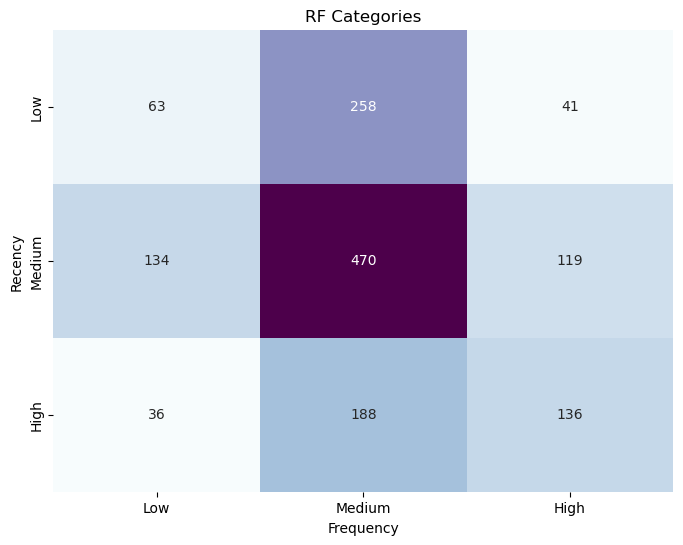

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('RF Categories')
plt.show()